# Artificial Neural Network

### Importing the libraries

In [192]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [193]:
tf.__version__

'2.7.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [194]:
dataset = pd.read_csv('/content/drive/MyDrive/Selected Project/Social_Network_Ads.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [212]:
print(X.shape)

(400, 3)


Label Encoding the "Gender" column

In [195]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [196]:
print(X)

[[1 19 19000]
 [1 35 20000]
 [0 26 43000]
 ...
 [0 50 20000]
 [1 36 33000]
 [0 49 36000]]


In [197]:
print(type(X))

<class 'numpy.ndarray'>


### Splitting the dataset into the Training set and Test set and valid set

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [199]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [200]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [201]:
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))

### Adding the second hidden layer

In [202]:
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Adding the output layer

In [203]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [204]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [205]:
history = ann.fit(X_train, y_train, validation_split=0.20 ,batch_size = 64, epochs = 100)

Epoch 1/100
4/4 [==============================] - 1s 46ms/step - loss: 0.6961 - accuracy: 0.5312 - val_loss: 0.6912 - val_accuracy: 0.6406
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6887 - accuracy: 0.5586 - val_loss: 0.6823 - val_accuracy: 0.6562
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6829 - accuracy: 0.5781 - val_loss: 0.6730 - val_accuracy: 0.7031
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6770 - accuracy: 0.6094 - val_loss: 0.6638 - val_accuracy: 0.7500
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6713 - accuracy: 0.6484 - val_loss: 0.6547 - val_accuracy: 0.7188
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6655 - accuracy: 0.6602 - val_loss: 0.6454 - val_accuracy: 0.7500
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6596 - accuracy: 0.6758 - val_loss: 0.6363 - val_accuracy: 0.7656
Epoch 8/100
4/4 [=========

### Predicting the Test set results

In [206]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


### Making the Confusion Matrix

In [207]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[55  3]
 [ 1 21]]


0.95

In [208]:
test_loss, test_acc = ann.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

3/3 - 0s - loss: 0.1801 - accuracy: 0.9500 - 108ms/epoch - 36ms/step

Test accuracy: 0.949999988079071


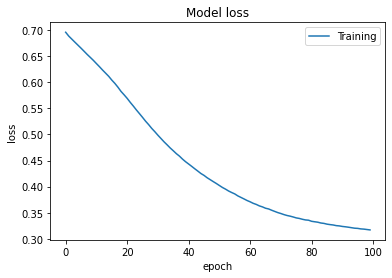

In [209]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Training'], loc='upper right')
plt.show()

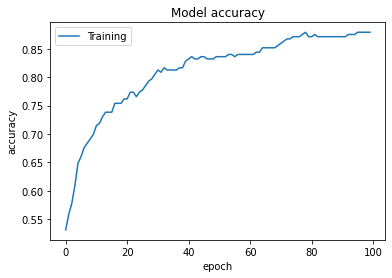

In [210]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Training'], loc='upper left')
plt.show()

<function matplotlib.pyplot.show>

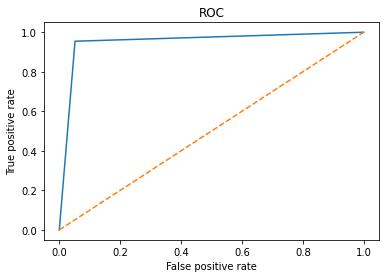

In [211]:
from sklearn.metrics import roc_curve
fpr,tpr ,thresholds =roc_curve(y_test,y_pred)
plt.figure(figsize=(6,4))
plt.title('ROC')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot(fpr,tpr,linestyle='-')
plt.plot([0,1],[0,1],linestyle='--')
plt.show